In [59]:
# importar librerias utilizadas
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree # Importamos el modelo de arboles de decision
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report # metricas
from sklearn.preprocessing import LabelEncoder # Para relizar encoding de la variable objetivo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Funcion propia para obtener un reporte de clasificacion en conjunto
def evaluate_model(y_true, y_pred):
    # se utiliza el parametro weighted para que se calcule la media ponderada por la naturaleza de clasificacion multiclase
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"Exactitud (Accuracy): {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Score F1: {f1}")
    print("Matriz de confusion:\n")
    print(cm)

# Funcion propia para obtener un reporte de clasificacion en conjunto para realizar analisis de bias,varianza,fitting
def diagnose_model_performance(y_train_true, y_train_pred, y_val_true, y_val_pred):
    # Calcular las métricas de rendimiento de los conjuntos de entrenamiento y validación
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    val_accuracy = accuracy_score(y_val_true, y_val_pred)
    
    train_f1 = f1_score(y_train_true, y_train_pred, average='weighted')
    val_f1 = f1_score(y_val_true, y_val_pred, average='weighted')
    
    # Las siguientes condiciones para determinar el rendimiento del modelo estan basadas en las definiciones de los terminos vistos en clase 
    # Diagnostico de Bias (sesgo) (underfitting vs. fitting vs. overfitting)
    if train_accuracy >= val_accuracy:
        bias_diagnosis = "Sesgo bajo (Fitting)"
    else:
        bias_diagnosis = "Sesgo elevado (Underfitting)"
    
    # Diagnostico de Varianza (overfitting)
    if train_f1 >= val_f1:
        variance_diagnosis = "Varianza baja"
    else:
        variance_diagnosis = "Varianza media (Overfitting)"
    
    # Diagnóstico del nivel de ajuste
    if bias_diagnosis == "Sesgo bajo (Fitting)" and variance_diagnosis == "Varianza baja":
        model_fit = "Buen ajuste (Reasonably Fitting)"
    else:
        model_fit = "Overfitting"  # Si no cumple los criterios de un buen ajuste
    
    return bias_diagnosis, variance_diagnosis, model_fit


In [32]:
data = load_iris()
print('Separacion de datos...\n\n')
# Separacion de los datos en entrenamiento y prueba utilizando train_test_split de sklearn
X = data.data
Y = data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)


Separacion de datos...




Entrenamiento de primer modelo:
Utilizando Gini como criterio para la ganancia de informacion:

Variable 0: Importancia: 0.0000
Variable 1: Importancia: 0.0000
Variable 2: Importancia: 0.0512
Variable 3: Importancia: 0.9488
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Excatitud del modelo:
 0.9666666666666667


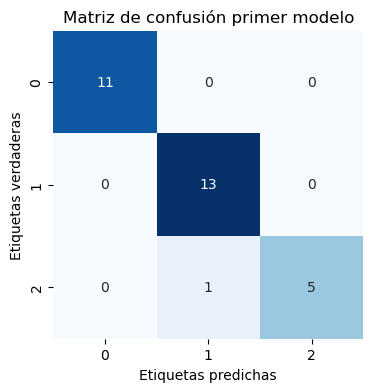

In [33]:
""" Primer modelo GINI """
print('Entrenamiento de primer modelo:')
print('Utilizando Gini como criterio para la ganancia de informacion:\n')
classifier = DecisionTreeClassifier(criterion='gini', random_state=0, splitter = 'best', max_depth = 3)
classifier.fit(X_train,Y_train)

for feature_idx, importance in enumerate(classifier.feature_importances_):
    print(f"Variable {feature_idx}: Importancia: {importance:.4f}")

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
# Accuracy score
print('Excatitud del modelo:\n', accuracy_score(y_pred,Y_test))

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión primer modelo')
plt.savefig('images/conf_mat_1mod.png')
plt.show()

Entrenamiento del segundo modelo:
Utilizando Entropía como criterio para la ganancia de informacion:

Variable 0: Importancia: 0.0000
Variable 1: Importancia: 0.0000
Variable 2: Importancia: 0.0688
Variable 3: Importancia: 0.9312
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Excatitud del modelo:
 0.9666666666666667
Se observa que al cambiar el criterio de ganancia de informacion
no se ve afectado el desempeño del modelo
NOTA: A partir de este momento utilizaremos el modelo a continuación (mejores parámetros)


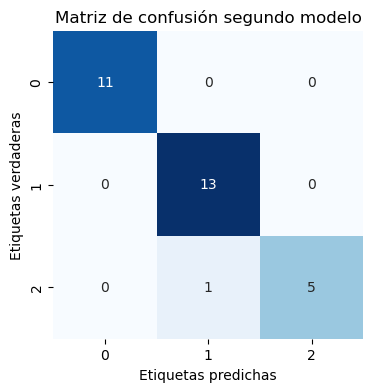

In [34]:
""" Segundo modelo Entropía """
print('Entrenamiento del segundo modelo:')
print('Utilizando Entropía como criterio para la ganancia de informacion:\n')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)
classifier_ent = DecisionTreeClassifier(criterion='entropy', random_state=0, splitter = 'best', max_depth = 3)
classifier_ent.fit(X_train,Y_train)

for feature_idx, importance in enumerate(classifier_ent.feature_importances_):
    print(f"Variable {feature_idx}: Importancia: {importance:.4f}")

y_pred_ent = classifier_ent.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred_ent))
print(confusion_matrix(Y_test, y_pred_ent))
# Accuracy score
print('Excatitud del modelo:\n',accuracy_score(y_pred_ent,Y_test))

print('Se observa que al cambiar el criterio de ganancia de informacion\nno se ve afectado el desempeño del modelo')
print('NOTA: A partir de este momento utilizaremos el modelo a continuación (mejores parámetros)')

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred_ent), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión segundo modelo')
plt.savefig('images/conf_mat_2mod.png')
plt.show()



Entrenamiento de modelo con los mejores parámetros:

Variable 0: Importancia: 0.0136
Variable 1: Importancia: 0.0546
Variable 2: Importancia: 0.5390
Variable 3: Importancia: 0.3927
Validation Set Metrics:
Exactitud (Accuracy): 1.0
Precision: 1.0
Recall: 1.0
Score F1: 1.0
Matriz de confusion:

[[12  0  0]
 [ 0  6  0]
 [ 0  0 12]]


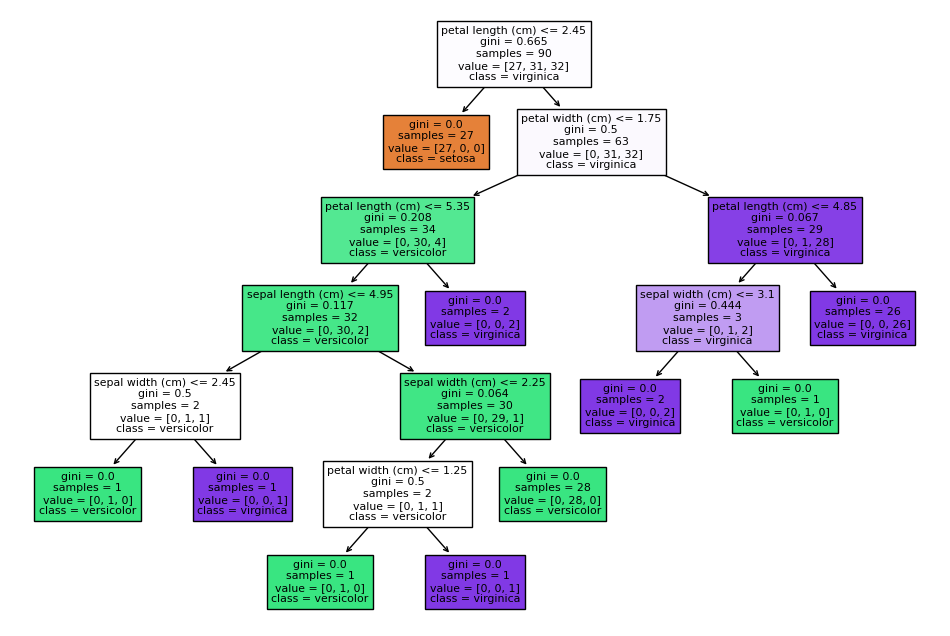

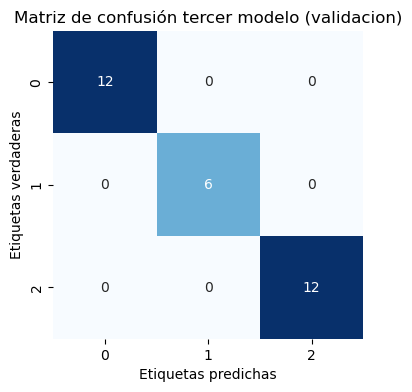


Test Set Metrics:
Exactitud (Accuracy): 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333
Score F1: 0.9333333333333333
Matriz de confusion:

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]


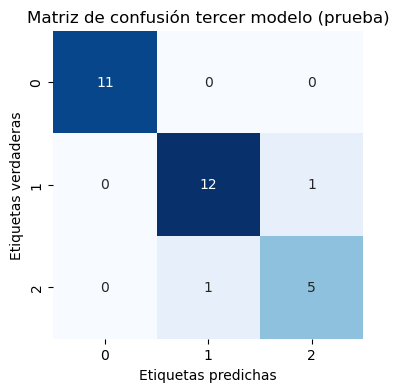

In [35]:

""" Tercer modelo (Best Params --Default Params--) """
print('\nEntrenamiento de modelo con los mejores parámetros:\n')
# Utilizando los mejores parámetros utilizados para realizar predicciones y observar la generalización del modelo
X = data.data
y = data.target

# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba 60-20-20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Modelo de clasificación con parametros default (best params)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

for feature_idx, importance in enumerate(clf.feature_importances_):
    print(f"Variable {feature_idx}: Importancia: {importance:.4f}")

# Realizar predicciones sobre el conjunto de validación
y_pred = clf.predict(X_validation)

# Visualizar arbol de decision
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.savefig("arbol_decision_best_params.png")

# Evaluar el modelo
print("Validation Set Metrics:")
evaluate_model(y_validation, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión tercer modelo (validacion)')
plt.savefig('images/conf_mat_3mod_val.png')
plt.show()

# Predicciones para el conjunto de prueba
y_test_pred = clf.predict(X_test)

# Evaluar el modelo con los datos de prueba
print("\nTest Set Metrics:")
evaluate_model(y_test, y_test_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión tercer modelo (prueba)')
plt.savefig('images/conf_mat_3mod_test.png')
plt.show()

In [36]:
print('Realizar predicciones sobre nuevos datos:')
# Define the new data as a numpy array
new_data = np.array([[4.5, 3.2, 1.3, 0.2],
                     [6.7, 3.1, 4.4, 1.4],
                     [5.1, 2.9, 3.3, 1.0],
                     [5.0, 2.0, 3.5, 1.0],
                     [5.9, 3.0, 5.1, 1.8]])

# Datos a usar
print(f'Nuevos datos a usar:\n{new_data}')

# Use the trained model to make predictions on the new data
new_data_predictions = clf.predict(new_data)

# Display the predictions
print('Predicciones para nuevos datos:')
for i, prediction in enumerate(new_data_predictions):
    print(f"Dato {i+1}: Prediccion clase - {prediction}")

Realizar predicciones sobre nuevos datos:
Nuevos datos a usar:
[[4.5 3.2 1.3 0.2]
 [6.7 3.1 4.4 1.4]
 [5.1 2.9 3.3 1. ]
 [5.  2.  3.5 1. ]
 [5.9 3.  5.1 1.8]]
Predicciones para nuevos datos:
Dato 1: Prediccion clase - 0
Dato 2: Prediccion clase - 1
Dato 3: Prediccion clase - 1
Dato 4: Prediccion clase - 1
Dato 5: Prediccion clase - 2


In [37]:
""" Ejecucion de Diagnostico de Bias, Varianza y ajuste """
print('\nEjecucion de Diagnostico de Bias, Varianza y ajuste\n')
# Obtener reporte de clasificacion en conjunto
bias_diagnosis, variance_diagnosis, model_fit = diagnose_model_performance(y_train, clf.predict(X_train), y_validation, y_pred)
print("Diagnostico de Bias:", bias_diagnosis)
print("Diagnostico de Varianza:", variance_diagnosis)
print("Diagnostico de Ajuste de Modelo (fit):", model_fit)


print('\nNOTA: Esta ejecucion de Diagnostico de Bias, Varianza y ajuste fue realizada para el modelo con los mejores parámetros.\nPor favor referirse a la documentación de las funciones para obtener un mejor entendimiento de las funciones utilizadas en este programa')
plt.show()


Ejecucion de Diagnostico de Bias, Varianza y ajuste

Diagnostico de Bias: Sesgo bajo (Fitting)
Diagnostico de Varianza: Varianza baja
Diagnostico de Ajuste de Modelo (fit): Buen ajuste (Reasonably Fitting)

NOTA: Esta ejecucion de Diagnostico de Bias, Varianza y ajuste fue realizada para el modelo con los mejores parámetros.
Por favor referirse a la documentación de las funciones para obtener un mejor entendimiento de las funciones utilizadas en este programa


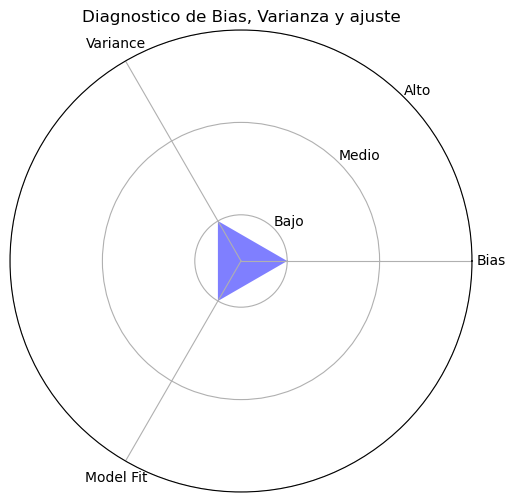

<Figure size 640x480 with 0 Axes>

In [57]:
# Datos
bias_diagnosis = "Low Bias (Fitting)"
variance_diagnosis = "Low Variance"
model_fit = "Good Fit (Reasonably Fitting)"

# Categorias y criterios para el diagnostico
categories = ['Bias', 'Variance', 'Model Fit']
criteria = [bias_diagnosis, variance_diagnosis, model_fit]

# Mapeo a un valor numerico para cada diagnostico
diagnosis_mapping = {
    "Low Bias (Fitting)": 1,
    "Medium Bias (Reasonably Fitting)": 3,
    "High Bias (Underfitting)": 5,

    "Low Variance": 1,
    "Medium Variance (Overfitting)": 3,
    "High Variance": 5,

    "Good Fit (Reasonably Fitting)": 1,
    "Overfitting": 5
}

# Criterios a numeros
values = [diagnosis_mapping[diagnosis] for diagnosis in criteria]

# Calculo de los angulos
num_categories = len(categories)
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles += angles[:1]

# Ensure that values have the same number of elements as categories
if len(values) != num_categories:
    raise ValueError("Number of values must match the number of categories")

# Crear grafica
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
ax.fill(angles, values + values[:1], 'b', alpha=0.5)

# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set radial axis label locations and format
ax.set_rlabel_position(45)
ax.set_yticks([1, 3, 5])
ax.set_yticklabels(['Bajo', 'Medio', 'Alto'], fontsize=10)

# Add a title
plt.title("Diagnostico de Bias, Varianza y ajuste")

# Display the radar chart
plt.show()
plt.savefig('images/bias_variance_fit.png')


Codigo Auxiliar para obtener graficos

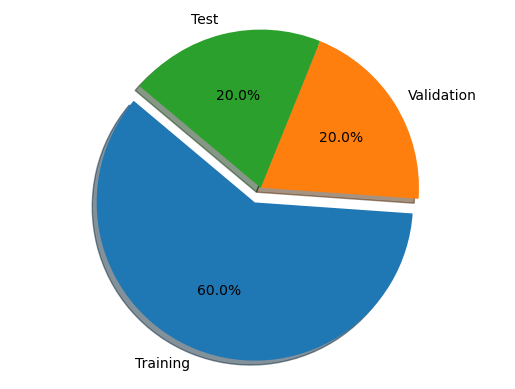

<Figure size 640x480 with 0 Axes>

In [9]:
# Calculate the sizes of each dataset
total_samples = len(X)
train_size = len(X_train)
validation_size = len(X_validation)
test_size = len(X_test)

# Calculate the percentages
train_percent = (train_size / total_samples) * 100
validation_percent = (validation_size / total_samples) * 100
test_percent = (test_size / total_samples) * 100

# Labels for the pie chart
labels = ['Training', 'Validation', 'Test']

# Sizes of each slice of the pie chart
sizes = [train_percent, validation_percent, test_percent]

# Explode the 'Training' slice to emphasize it
explode = (0.1, 0, 0)

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()
plt.savefig('division_pie_chart.png')

In [62]:
""" Cuarto Modelo (hyperparameter tuning)"""
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 2, 3, 5],  # You can adjust the range of values
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Mejores Hiperparámetros:")
print(best_params)

# Get the best classifier with the optimal hyperparameters
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the validation set
y_validation_pred = best_classifier.predict(X_validation)

# Evaluate the model's performance on the validation set
from sklearn.metrics import accuracy_score, classification_report

print("\nValidation Set Metrics:")
print("Accuracy:", accuracy_score(y_validation, y_validation_pred))
print("Reporte de Clasificacion:\n", classification_report(y_validation, y_validation_pred))

# Now, you can further evaluate the best classifier on the test set
y_test_pred = best_classifier.predict(X_test)

# Evaluate the model's performance on the test set
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Reporte de Clasificacion:\n", classification_report(y_test, y_test_pred))


Mejores Hiperparámetros:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Validation Set Metrics:
Accuracy: 1.0
Reporte de Clasificacion:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Test Set Metrics:
Accuracy: 1.0
Reporte de Clasificacion:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

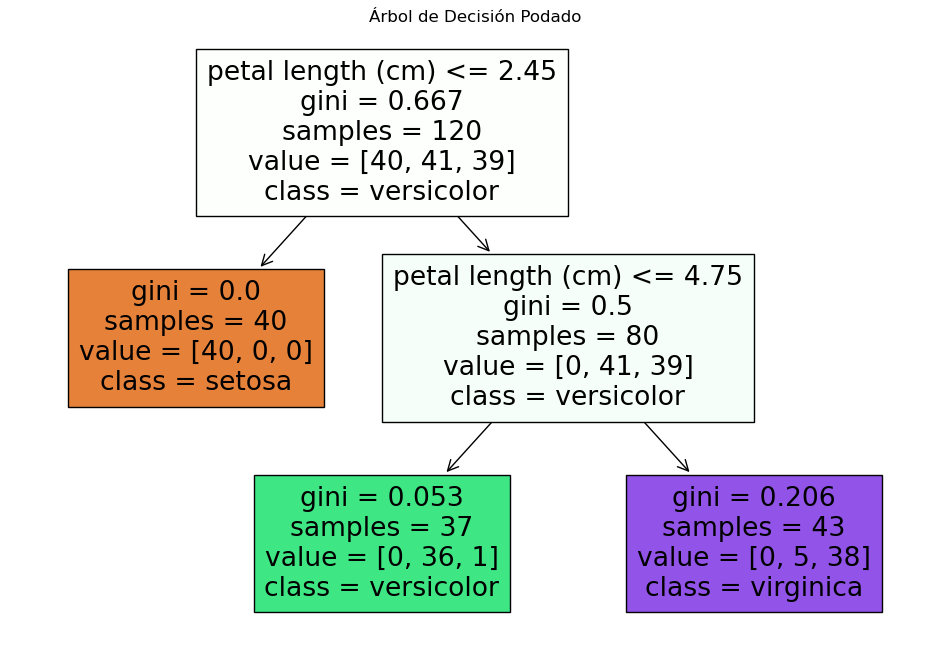

Test Set Metrics:
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [64]:
# Split the dataset into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree classifier with ccp_alpha as the pruning parameter
clf = DecisionTreeClassifier(ccp_alpha=0.03, random_state=42)

# Fit the decision tree on the training data
clf.fit(X_train, y_train)

# Visualize the pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Árbol de Decisión Podado")
plt.show()

# Evaluate the pruned tree on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report

print("Test Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))